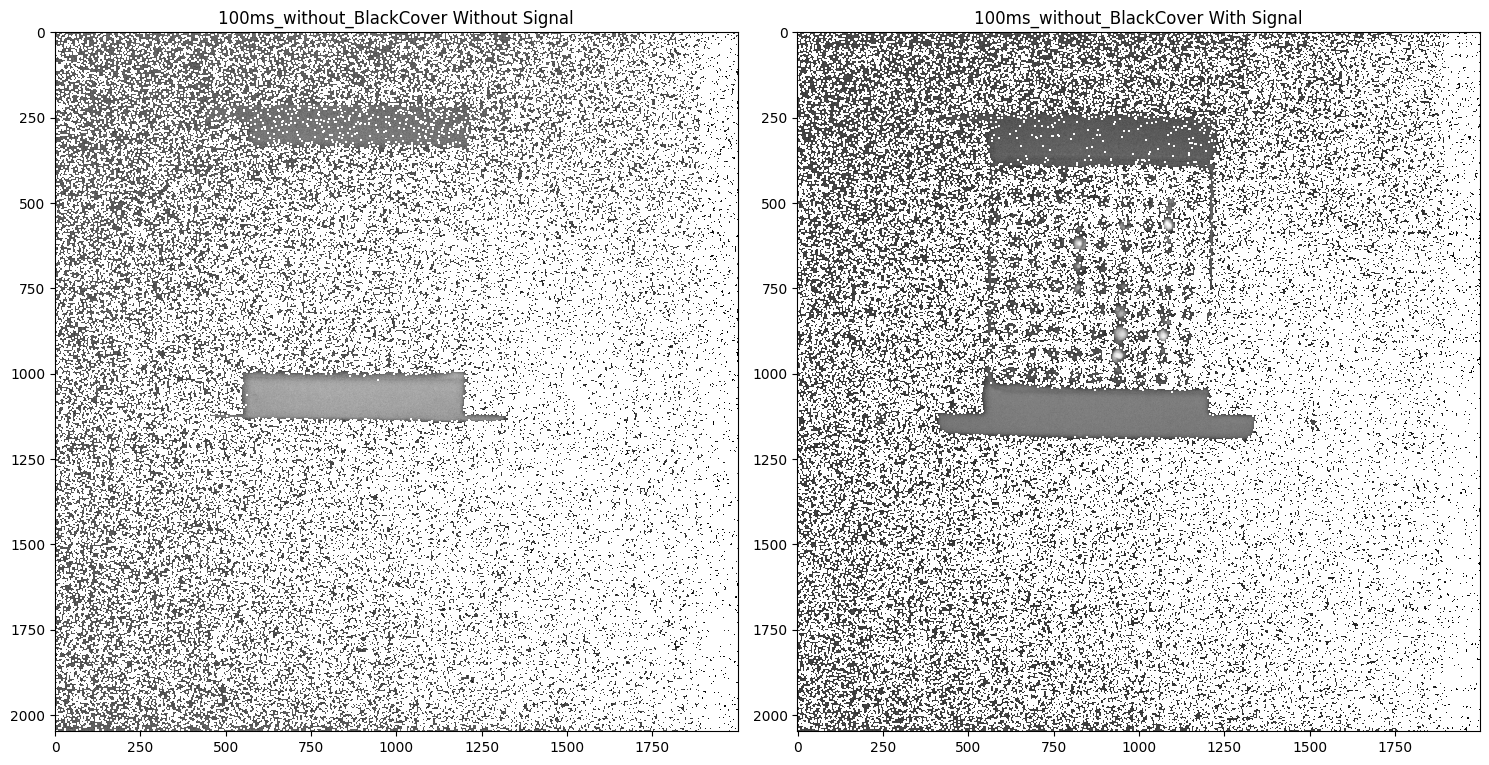

In [45]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from matplotlib.colors import LogNorm


def open_fits_file(ax, file_path, title):
    with fits.open(file_path, do_not_scale=True) as hdul:
        primary_hdu = hdul[0]
        image_data = primary_hdu.data

    bscale = primary_hdu.header.get('BSCALE', 1.0)
    bzero = primary_hdu.header.get('BZERO', 0.0)
    image_data = bscale * image_data + bzero

    masked_image_data = np.ma.masked_invalid(image_data)
    
    min = np.min(masked_image_data)
    max = np.max(masked_image_data)
    mean_val = np.mean(masked_image_data)
    std_val = np.std(masked_image_data)

    vmin = mean_val - 0.5 * std_val
    vmax = mean_val + 2 * std_val
    norm = LogNorm()
    
    # Display the image
    im = ax.imshow(image_data, cmap='gray', norm=norm)
    ax.set_title(title)

def open_multiple_fits_files(file_paths, titles):
    fig, axes = plt.subplots(1, len(titles), figsize=(15, 8))

    for i in range(len(titles)):
        open_fits_file(axes[i], file_paths[i], titles[i])

    plt.tight_layout()
    plt.show()

without_signal = 'images/experiment 9/100ms_without_BlackCover/without_signal_1.fits'
with_signal = 'images/experiment 9/100ms_without_BlackCover/with_signal_1.fits'
file_paths = [without_signal, with_signal]
titles = ['100ms_without_BlackCover Without Signal', '100ms_without_BlackCover With Signal']

open_multiple_fits_files(file_paths, titles)


Mean: 7.603920059705257, Std Dev: 25.73491928847624
Mean: -2.2988077807634697e-08, Std Dev: 1.0000000271806693


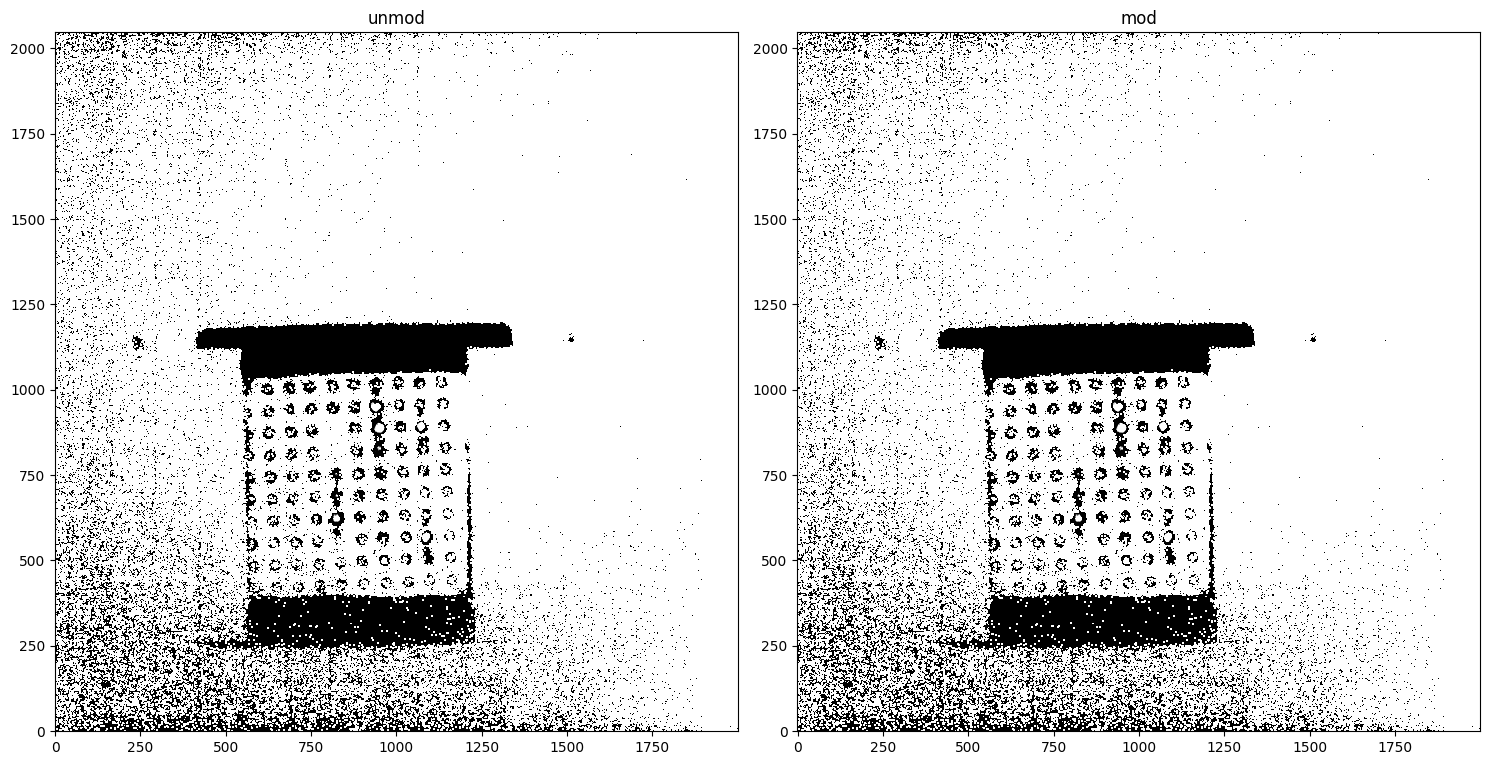

In [30]:
def modify_fits_file(input_file_path, output_file_path):
    # Open the FITS file
    with fits.open(input_file_path) as hdul:
        # Access the primary HDU
        primary_hdu = hdul[0]
        
        # Get the image data
        image_data = primary_hdu.data

    # Mask NaN values in the image data
    masked_image_data = np.ma.masked_invalid(image_data)

    # Z-scaling
    mean_val = np.mean(masked_image_data)
    std_val = np.std(masked_image_data)
    z_scaled_data = (masked_image_data - mean_val) / std_val

    # Save the modified data to a new FITS file
    hdu = fits.PrimaryHDU(z_scaled_data.filled(np.nan))
    hdu.writeto(output_file_path, overwrite=True)

# Paths to the input and output FITS files
input_file_path = 'images/experiment 9/100ms_without_BlackCover/with_signal.fits'
output_file_path = 'images/experiment 9/output/with_signal_modified.fits'

# Modify the FITS file and save the result
modify_fits_file(input_file_path, output_file_path)

file_paths = [input_file_path, output_file_path]
titles = ['unmod', 'mod']
open_multiple_fits_files(file_paths, titles)

[[ 4. 17. 10. ... 12. 15.  9.]
 [12. 12. 13. ...  5. 11. 10.]
 [ 3. 15.  8. ...  3.  9.  5.]
 ...
 [16. 10. 10. ...  3.  9. 10.]
 [ 2.  9.  1. ...  8.  5.  3.]
 [ 5. 18. 20. ... nan nan  2.]]
[[ 4. 14. 16. ... 13.  1.  3.]
 [ 7. 15.  9. ...  4. 13.  9.]
 [ 9.  8. 14. ... nan 14. -1.]
 ...
 [-4. 12. 13. ...  7. -2. nan]
 [ 8. 14.  6. ...  5. -1. -1.]
 [ 6. 13. 11. ... -2. -3.  1.]]
[[  0.  -3.   6. ...   1. -14.  -6.]
 [ -5.   3.  -4. ...  -1.   2.  -1.]
 [  6.  -7.   6. ...  nan   5.  -6.]
 ...
 [-20.   2.   3. ...   4. -11.  nan]
 [  6.   5.   5. ...  -3.  -6.  -4.]
 [  1.  -5.  -9. ...  nan  nan  -1.]]


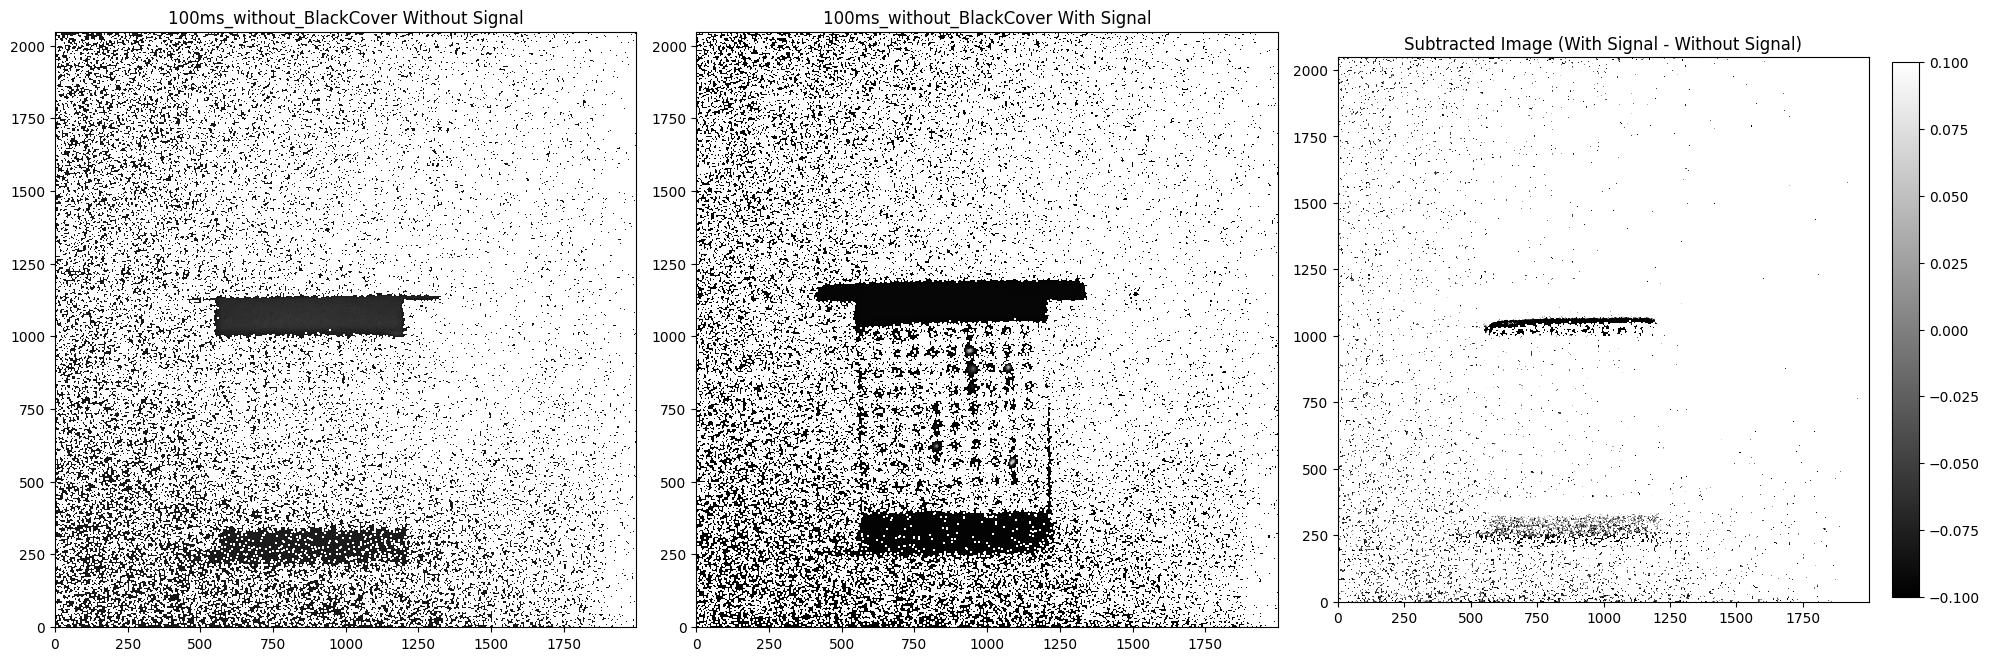

In [3]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from matplotlib.colors import Normalize
from astropy.visualization import ZScaleInterval

def open_fits_file(file_path):
    with fits.open(file_path) as hdul:
        primary_hdu = hdul[0]
        image_data = primary_hdu.data
    return image_data

def subtract_images(image1, image2):
    return image1 - image2

def display_image(ax, image_data, title, norm=None):
    z = ZScaleInterval()
    print(image_data)
    masked_image_data = np.ma.masked_invalid(image_data)
    mean_val = np.mean(masked_image_data)
    std_val = np.std(masked_image_data)
    z_scaled_data = (masked_image_data - mean_val) / std_val
    z1,z2 = z.get_limits(image_data)

    im = ax.imshow(z_scaled_data, cmap='gray', origin='lower', norm=norm)
    ax.set_title(title)
    return im

without_signal_path = 'images/experiment 9/100ms_without_BlackCover/without_signal.fits'
with_signal_path = 'images/experiment 9/100ms_without_BlackCover/with_signal.fits'

without_signal_data = open_fits_file(without_signal_path)
with_signal_data = open_fits_file(with_signal_path)

subtracted_data = subtract_images(with_signal_data, without_signal_data)

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

display_image(axes[0], without_signal_data, '100ms_without_BlackCover Without Signal')
display_image(axes[1], with_signal_data, '100ms_without_BlackCover With Signal')
norm = Normalize(vmin=np.min(subtracted_data), vmax=np.max(subtracted_data))
im = display_image(axes[2], subtracted_data, 'Subtracted Image (With Signal - Without Signal)', norm=norm)

fig.colorbar(im, ax=axes[2], orientation='vertical', fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


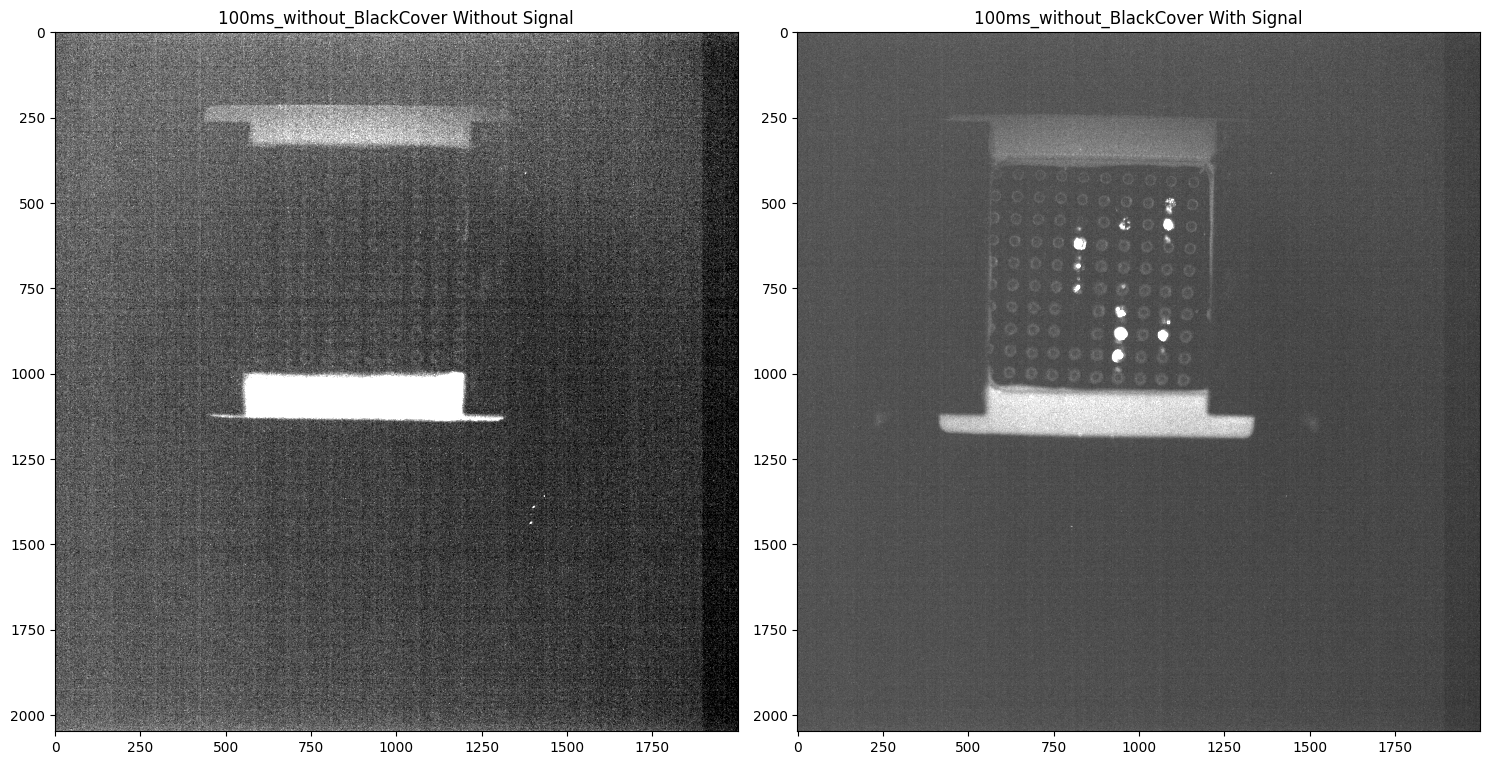

In [103]:
def open_fits_file(ax, file_path, title):
    with fits.open(file_path, do_not_scale_image_data=True) as hdul:
        primary_hdu = hdul[0]
        image_data = primary_hdu.data

    bscale = primary_hdu.header.get('BSCALE', 1.0)
    bzero = primary_hdu.header.get('BZERO', 0.0)
    image_data = bscale * image_data + bzero

    masked_image_data = np.ma.masked_invalid(image_data)
    mean_val = np.mean(masked_image_data)
    std_val = np.std(masked_image_data)
    vmin = mean_val - std_val
    vmax = mean_val + 2 * std_val
    norm = LogNorm()

    im = ax.imshow(masked_image_data, cmap='gray', vmin=vmin, vmax=vmax)
    ax.set_title(title)


without_signal = 'images/experiment 9/100ms_without_BlackCover/without_signal_1.fits'
with_signal = 'images/experiment 9/100ms_without_BlackCover/with_signal_1.fits'
file_paths = [without_signal, with_signal]
titles = ['100ms_without_BlackCover Without Signal', '100ms_without_BlackCover With Signal']

open_multiple_fits_files(file_paths, titles)


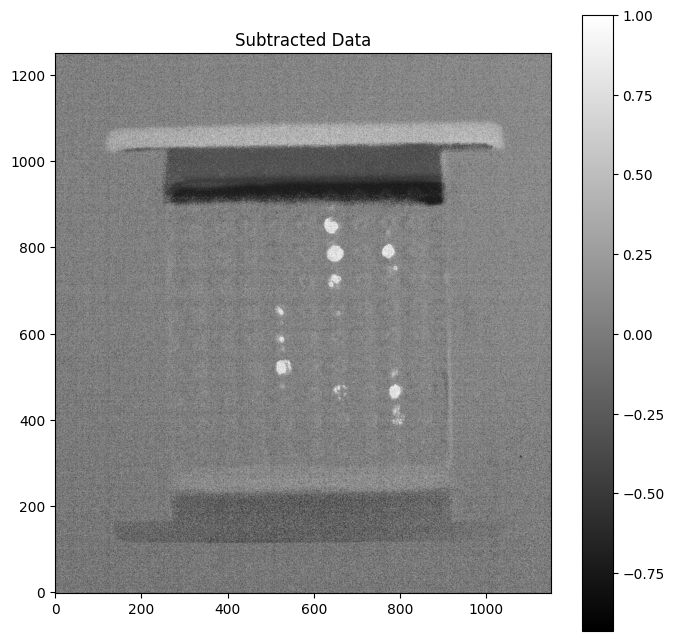

In [102]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

def open_fits_file(file_path, do_not_scale=True):
    with fits.open(file_path, do_not_scale_image_data=do_not_scale) as hdul:
        primary_hdu = hdul[0]
        image_data = primary_hdu.data

        bscale = primary_hdu.header.get('BSCALE', 1.0)
        bzero = primary_hdu.header.get('BZERO', 0.0)
        scaled_data = bscale * image_data + bzero

        cropped_data = scaled_data[50:1350, 150:1450]
    return cropped_data

def apply_scaling(data):
    masked_image_data = np.ma.masked_invalid(data)
    mean_val = np.mean(masked_image_data)
    std_val = np.std(masked_image_data)
    vmin = mean_val - std_val
    vmax = mean_val + 2 * std_val

    scaled_data = np.clip(data, vmin, vmax)
    scaled_data = (scaled_data - vmin) / (vmax - vmin) 

    return scaled_data, vmin, vmax

def save_fits_file(data, file_path):
    hdu = fits.PrimaryHDU(data)
    hdul = fits.HDUList([hdu])
    hdul.writeto(file_path, overwrite=True)

def process_and_save(file_paths, titles, output_paths):
    for i in range(len(file_paths)):
        scaled_data = open_fits_file(file_paths[i])
        scaled_data, vmin, vmax = apply_scaling(scaled_data)
        save_fits_file(scaled_data, output_paths[i])

def subtract_images(without_signal, with_signal):
    data1 = open_fits_file(without_signal, do_not_scale=False)
    data2 = open_fits_file(with_signal, do_not_scale=False)
    return data2 - data1

without_signal = 'images/experiment 9/100ms_without_BlackCover/without_signal_1.fits'
with_signal = 'images/experiment 9/100ms_without_BlackCover/with_signal_1.fits'
output_without_signal = 'images/experiment 9/100ms_without_BlackCover/without_signal_scaled.fits'
output_with_signal = 'images/experiment 9/100ms_without_BlackCover/with_signal_scaled.fits'
file_paths = [without_signal, with_signal]
titles = ['100ms_without_BlackCover Without Signal', '100ms_without_BlackCover With Signal']
output_paths = [output_without_signal, output_with_signal]

process_and_save(file_paths, titles, output_paths)

subtracted_data = subtract_images(output_without_signal, output_with_signal)
save_fits_file(subtracted_data, 'images/experiment 9/100ms_without_BlackCover/subtracted_data.fits')

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(subtracted_data, cmap='gray', origin='lower')
ax.set_title('Subtracted Data')
plt.colorbar(im, ax=ax)
plt.show()


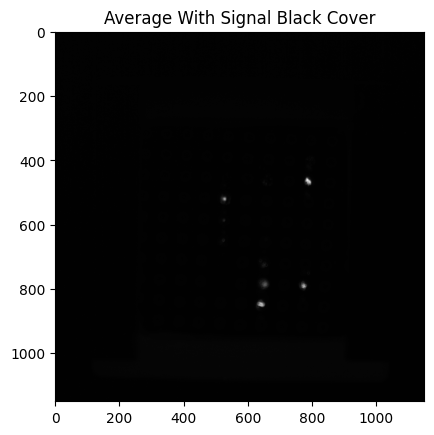

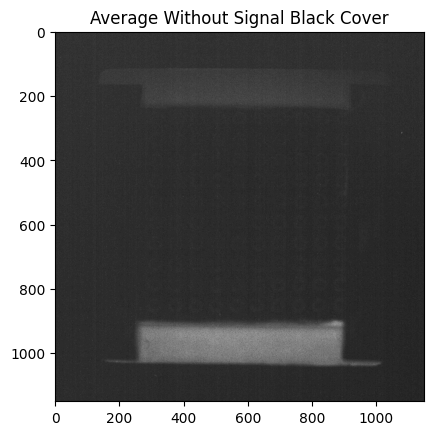

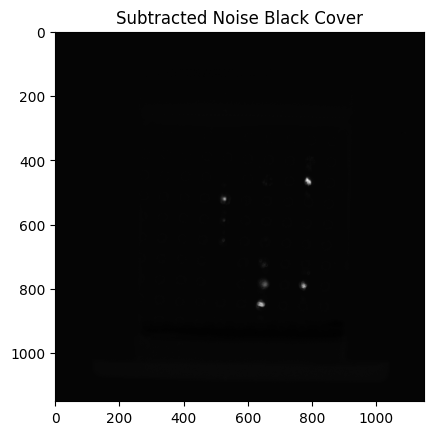

In [86]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

def open_fits_file(file_path, crop=True):
    with fits.open(file_path, do_not_scale_image_data=True) as hdul:
        primary_hdu = hdul[0]
        image_data = primary_hdu.data

        bscale = primary_hdu.header.get('BSCALE', 1.0)
        bzero = primary_hdu.header.get('BZERO', 0.0)
        scaled_data = bscale * image_data + bzero
        if crop:
            cropped_data = scaled_data[100:1250, 300:1450]
        else:
            cropped_data = scaled_data
    return cropped_data

def apply_scaling(data):
    masked_image_data = np.ma.masked_invalid(data)
    mean_val = np.mean(masked_image_data)
    std_val = np.std(masked_image_data)
    vmin = mean_val - std_val
    vmax = mean_val + 2 * std_val
    print(f'vmin: {vmin}, vmax: {vmax}')
    scaled_data = np.clip(data, vmin, vmax)
    scaled_data = (scaled_data - vmin) / (vmax - vmin) 

    return scaled_data, vmin, vmax

def calculate_average(file_paths):
    sum_images = None
    num_images = len(file_paths)

    for file_path in file_paths:
        data = open_fits_file(file_path)
        if sum_images is None:
            sum_images = data
        else:
            sum_images += data

    average_image = sum_images / num_images
    return average_image

def save_fits_file(data, file_path):
    hdu = fits.PrimaryHDU(data)
    hdul = fits.HDUList([hdu])
    hdul.writeto(file_path, overwrite=True)

def process_image(file_paths, titles, scaling=False):
    for i in range(len(file_paths)):
        scaled_data = open_fits_file(file_paths[i])
        if scaling:
            scaled_data, vmin, vmax = apply_scaling(scaled_data)
        save_fits_file(scaled_data, f'{titles[i][:-5]}+scaled.fits')

def subtract_images(file_path1, file_path2):
    data1 = open_fits_file(file_path1, do_not_scale=False)
    data2 = open_fits_file(file_path2, do_not_scale=False)
    return data2 - data1

def display_image(image_data, title):
    fig = plt.plot(figsize=(8, 8))
    plt.imshow(image_data, cmap='gray')
    plt.title(title)
    plt.show()

# ms100_cap_on_files =[
#     'images/experiment 9/100ms_CapOn/trial_1.fits',
#     'images/experiment 9/100ms_CapOn/trial_2.fits',
#     'images/experiment 9/100ms_CapOn/trial_3.fits',
#     'images/experiment 9/100ms_CapOn/trial_4.fits',
#     'images/experiment 9/100ms_CapOn/trial_5.fits',
#     'images/experiment 9/100ms_CapOn/trial_6.fits'
# ]
def get_file_paths(file_path):
    with_signal_files = []
    without_signal_files = []
    for i in range(1, 7):
        with_signal_files.append(file_path + f'with_signal_{i}.fits')
        without_signal_files.append(file_path + f'without_signal_{i}.fits')
    return with_signal_files, without_signal_files

output_with_signal_files = []
with_signal_files, without_signal_files = get_file_paths('images/experiment 9/100ms_without_BlackCover/')

average_with_signal = calculate_average(with_signal_files)
average_without_signal = calculate_average(without_signal_files)
display_image(average_with_signal, 'Average With Signal Black Cover')
display_image(average_without_signal, 'Average Without Signal Black Cover')

subtract_noise = average_with_signal - average_without_signal

save_fits_file(subtract_noise, 'images/experiment 9/100ms_without_BlackCover/subtracted_data.fits')
display_image(subtract_noise, 'Subtracted Noise Black Cover')

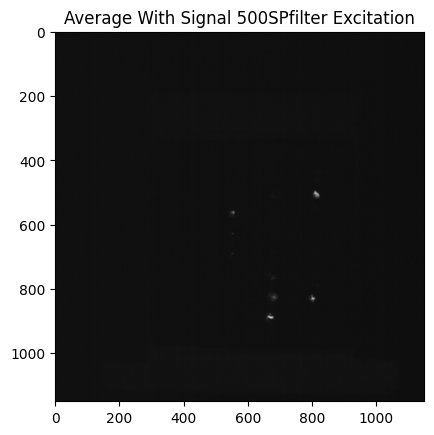

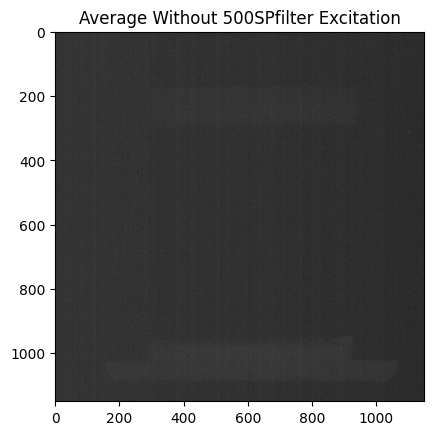

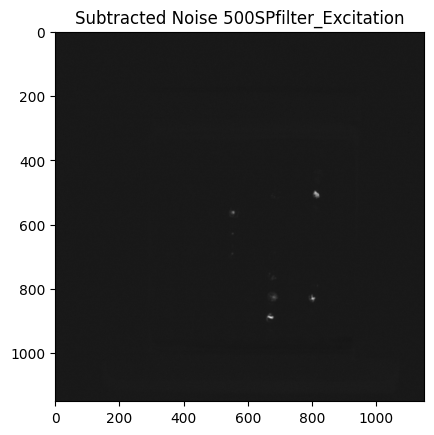

In [87]:
with_signal_files, without_signal_files = get_file_paths('images/experiment 9/100ms_500SPfilter_Excitation/')

average_with_signal = calculate_average(with_signal_files)
average_without_signal = calculate_average(without_signal_files)
display_image(average_with_signal, 'Average With Signal 500SPfilter Excitation')
display_image(average_without_signal, 'Average Without 500SPfilter Excitation')

subtract_noise = average_with_signal - average_without_signal

save_fits_file(subtract_noise, 'images/experiment 9/100ms_500SPfilter_Excitation/subtracted_data.fits')
display_image(subtract_noise, 'Subtracted Noise 500SPfilter_Excitation')

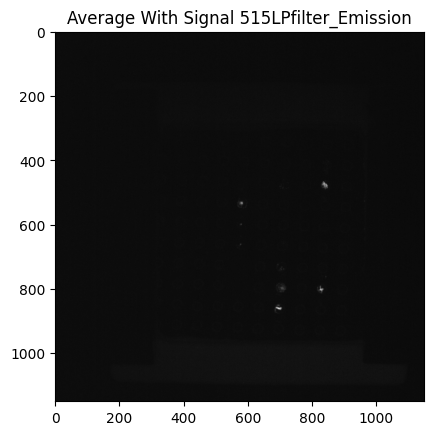

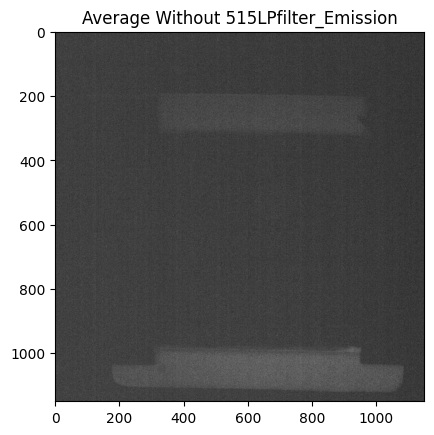

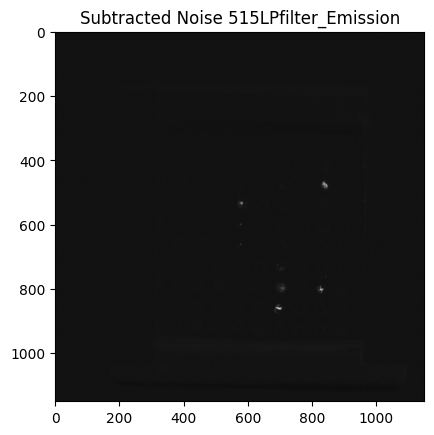

In [88]:
with_signal_files, without_signal_files = get_file_paths('images/experiment 9/100ms_515LPfilter_Emission/')

average_with_signal = calculate_average(with_signal_files)
average_without_signal = calculate_average(without_signal_files)
display_image(average_with_signal, 'Average With Signal 515LPfilter_Emission')
display_image(average_without_signal, 'Average Without 515LPfilter_Emission')

subtract_noise = average_with_signal - average_without_signal

save_fits_file(subtract_noise, 'images/experiment 9/100ms_515LPfilter_Emission/subtracted_data.fits')
display_image(subtract_noise, 'Subtracted Noise 515LPfilter_Emission')

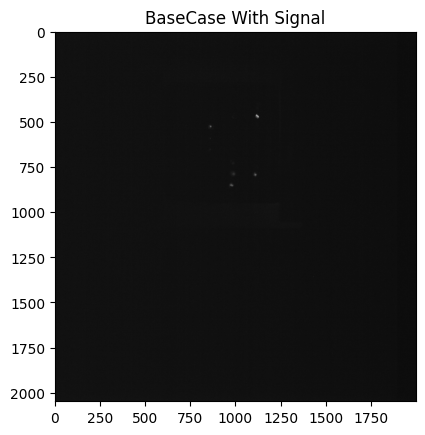

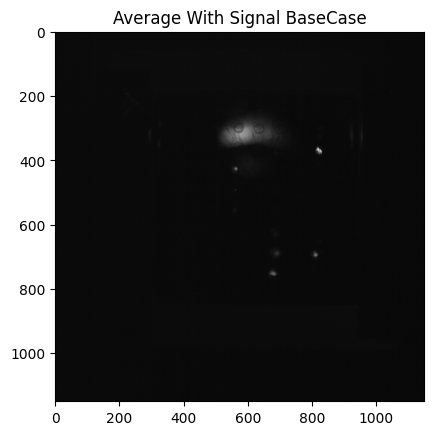

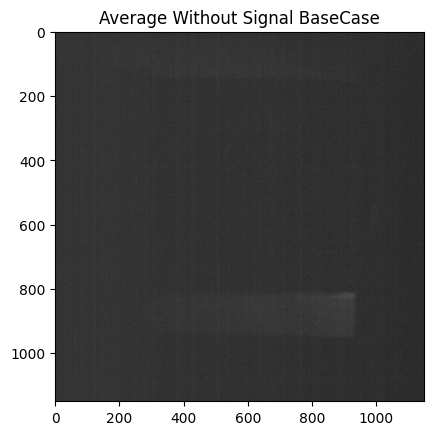

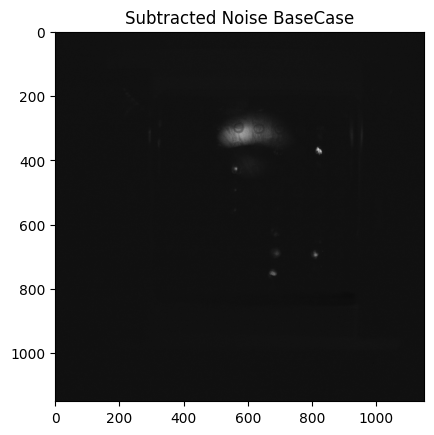

In [100]:
with_signal_files, without_signal_files = get_file_paths('images/experiment 9/100ms_BaseCase/')

display_image(open_fits_file('images/experiment 9/100ms_BaseCase/with_signal_5.fits', crop=False), 'BaseCase With Signal')

average_with_signal = calculate_average(with_signal_files)
average_without_signal = calculate_average(without_signal_files)
display_image(average_with_signal, 'Average With Signal BaseCase')
display_image(average_without_signal, 'Average Without Signal BaseCase')

subtract_noise = average_with_signal - average_without_signal

save_fits_file(subtract_noise, 'images/experiment 9/100ms_BaseCase/subtracted_data.fits')
display_image(subtract_noise, 'Subtracted Noise BaseCase')

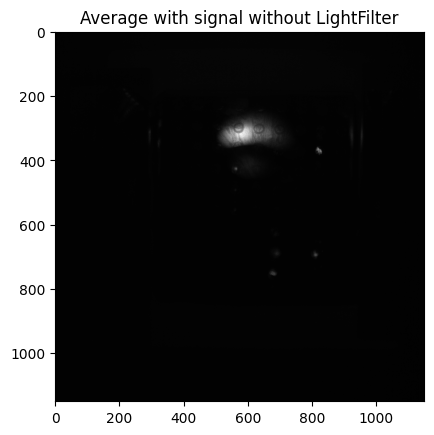

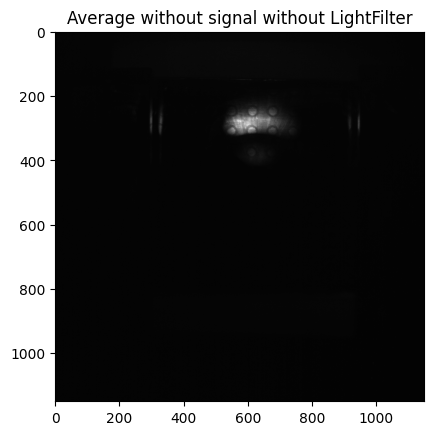

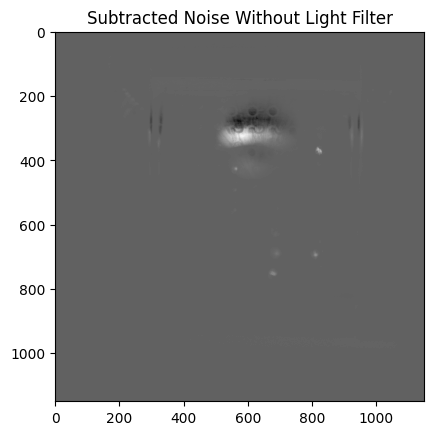

In [98]:
with_signal_files, without_signal_files = get_file_paths('images/experiment 9/100ms_without_LightFilter/')

average_with_signal = calculate_average(with_signal_files)
average_without_signal = calculate_average(without_signal_files)
display_image(average_with_signal, 'Average with signal without LightFilter')
display_image(average_without_signal, 'Average without signal without LightFilter')

subtract_noise = average_with_signal - average_without_signal

save_fits_file(subtract_noise, 'images/experiment 9/100ms_without_LightFilter/subtracted_data.fits')
display_image(subtract_noise, 'Subtracted Noise Without Light Filter')

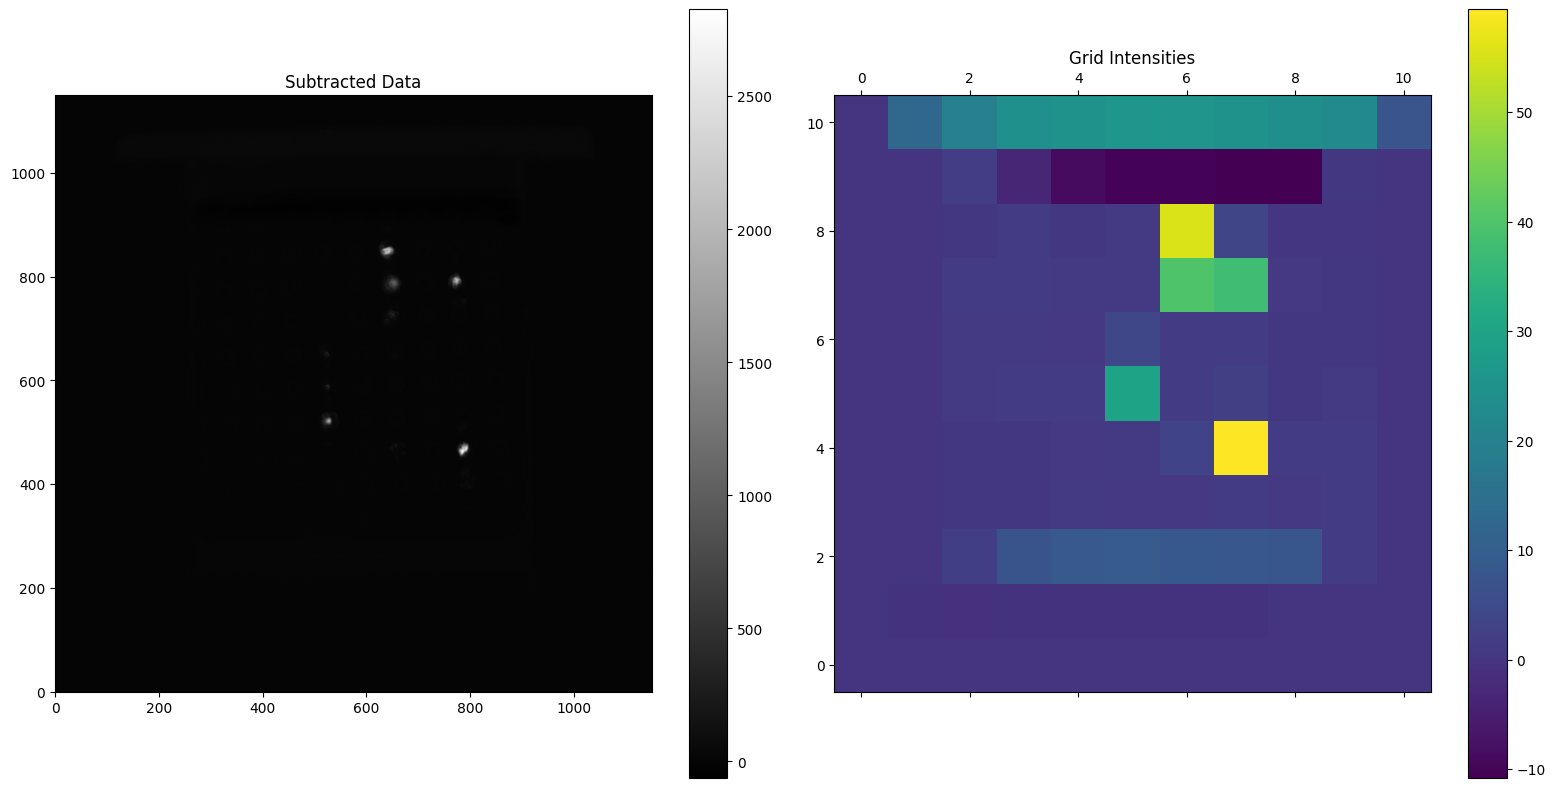

In [92]:
def calculate_grid_intensity(image_data, grid_size):
    grid_height, grid_width = grid_size
    image_height, image_width = image_data.shape

    num_grids_y = image_height // grid_height
    num_grids_x = image_width // grid_width

    grid_intensities = np.zeros((num_grids_y, num_grids_x))

    for i in range(num_grids_y):
        for j in range(num_grids_x):
            grid = image_data[i * grid_height:(i + 1) * grid_height, j * grid_width:(j + 1) * grid_width]
            grid_intensities[i, j] = np.mean(grid)

    return grid_intensities

subtracted_image_path = 'images/experiment 9/100ms_without_BlackCover/subtracted_data.fits'
with fits.open(subtracted_image_path) as hdul:
    subtracted_data = hdul[0].data

grid_size = (100, 100) 

grid_intensities = calculate_grid_intensity(subtracted_data, grid_size)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

im1 = ax1.imshow(subtracted_data, cmap='gray', origin='lower')
ax1.set_title('Subtracted Data')
plt.colorbar(im1, ax=ax1)

cax = ax2.matshow(grid_intensities, cmap='viridis', origin='lower')
ax2.set_title('Grid Intensities')
plt.colorbar(cax, ax=ax2)

plt.tight_layout()
plt.show()

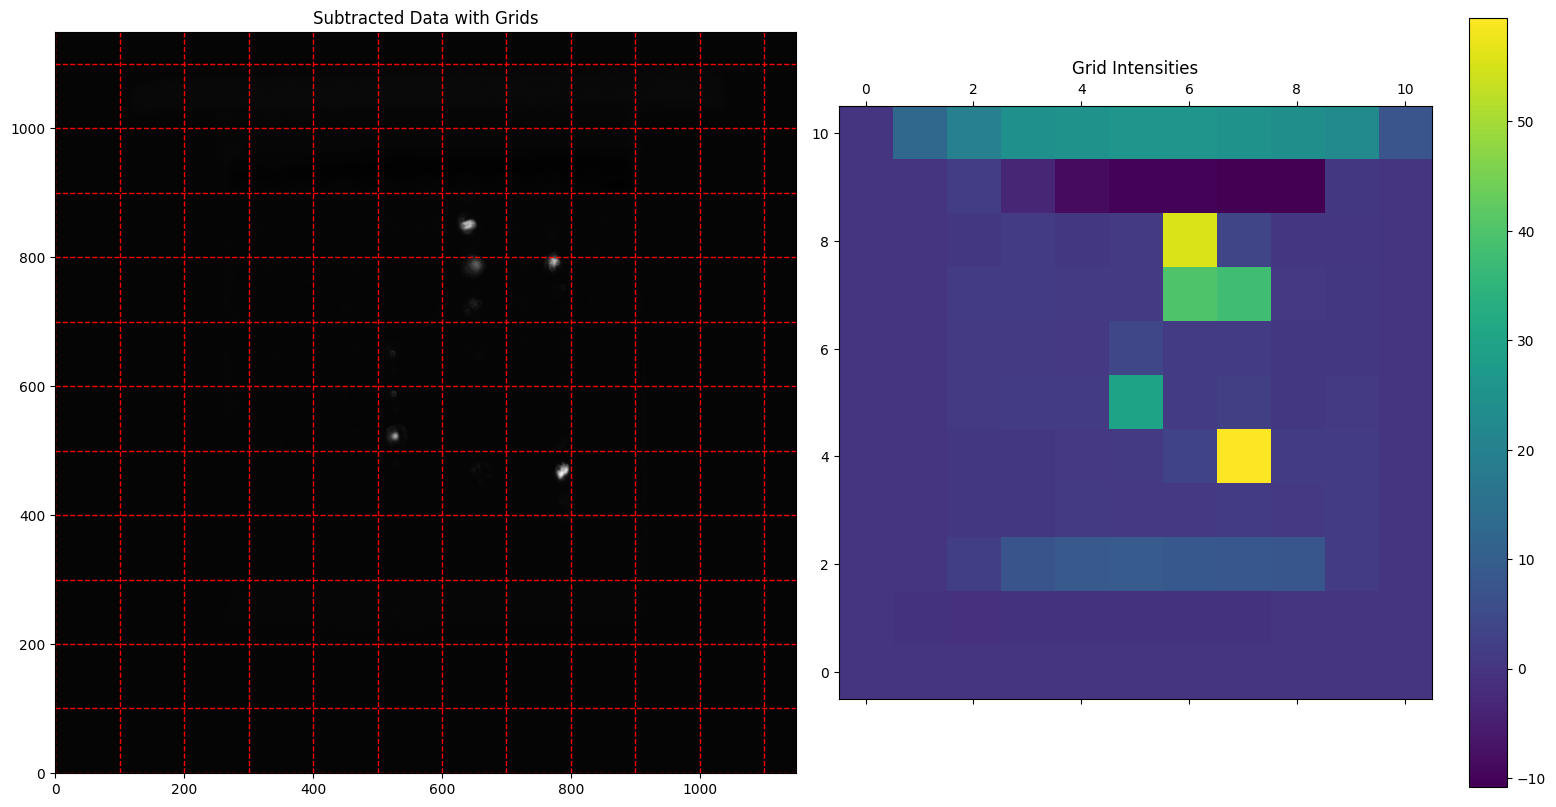

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def calculate_grid_intensity(image_data, grid_size):
    grid_height, grid_width = grid_size
    image_height, image_width = image_data.shape

    num_grids_y = image_height // grid_height
    num_grids_x = image_width // grid_width

    grid_intensities = np.zeros((num_grids_y, num_grids_x))

    for i in range(num_grids_y):
        for j in range(num_grids_x):
            grid = image_data[i * grid_height:(i + 1) * grid_height, j * grid_width:(j + 1) * grid_width]
            grid_intensities[i, j] = np.mean(grid)

    return grid_intensities

def plot_grid_on_image(ax, image_data, grid_size):
    ax.imshow(image_data, cmap='gray', origin='lower')
    grid_height, grid_width = grid_size
    image_height, image_width = image_data.shape

    # Draw red grid lines
    for y in range(0, image_height, grid_height):
        ax.axhline(y, color='red', linestyle='--', linewidth=1)
    for x in range(0, image_width, grid_width):
        ax.axvline(x, color='red', linestyle='--', linewidth=1)

    ax.set_title('Subtracted Data with Grids')

subtracted_image_path = 'images/experiment 9/100ms_without_BlackCover/subtracted_data.fits'
with fits.open(subtracted_image_path) as hdul:
    subtracted_data = hdul[0].data

grid_size = (100, 100)  

grid_intensities = calculate_grid_intensity(subtracted_data, grid_size)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

plot_grid_on_image(ax1, subtracted_data, grid_size)

cax = ax2.matshow(grid_intensities, cmap='viridis', origin='lower')
ax2.set_title('Grid Intensities')
plt.colorbar(cax, ax=ax2)

plt.tight_layout()
plt.show()


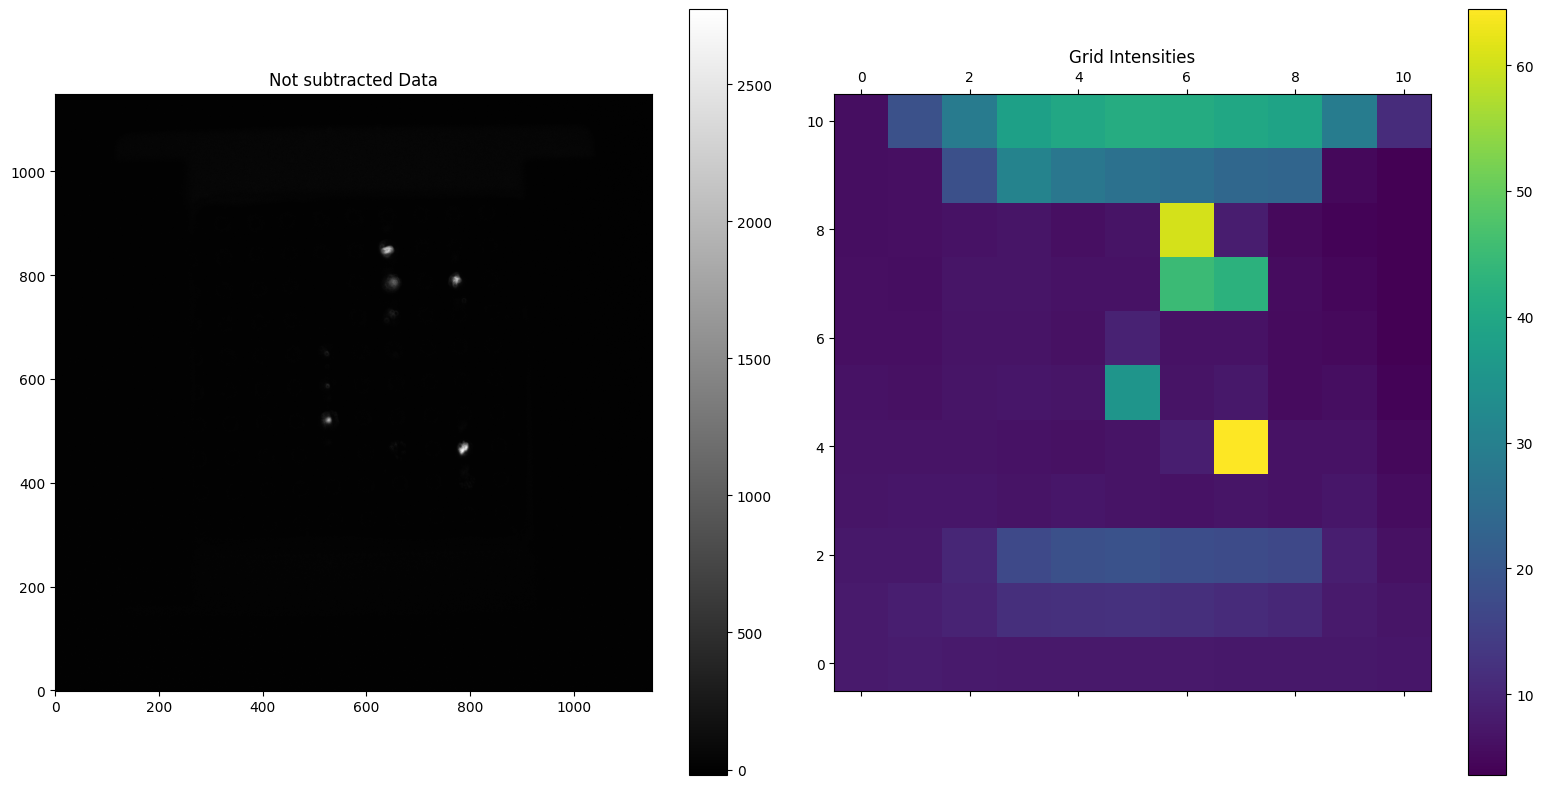

In [97]:
image_path = 'images/experiment 9/100ms_without_BlackCover/with_signal_1.fits'
cropped_data = open_fits_file(image_path)
grid_size = (100, 100) 

grid_intensities = calculate_grid_intensity(cropped_data, grid_size)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

im1 = ax1.imshow(cropped_data, cmap='gray', origin='lower')
ax1.set_title('Not subtracted Data')
plt.colorbar(im1, ax=ax1)

cax = ax2.matshow(grid_intensities, cmap='viridis', origin='lower')
ax2.set_title('Grid Intensities')
plt.colorbar(cax, ax=ax2)

plt.tight_layout()
plt.show()